# Count years of experience

In [1]:
import pandas as pd
import re
import regex

#Plotagem
%matplotlib inline 
import matplotlib.pyplot as plt 
import seaborn as sns

In [19]:
df = pd.read_csv('job_bioinfo_csv/bioinf_ads_deduplicated.csv')
df.head(2)

,Unnamed: 0.1,Unnamed: 0,diffbotUri,humanLanguage,id,lastCrawlTime,name,pageUrl,requirements,resolvedPageUrl,summary,tasks,text,title,type,word_count
0,0,0,http://diffbot.com/entity/JOB966384586,en,JOB966384586,1591962958,"Bioinformatics Specialist, GIS",https://www.nature.com/naturecareers/job/bioin...,NaN,NaN,The Genomics Institute of Singapore () has an ...,NaN,The Genomics Institute of Singapore () has an ...,"Bioinformatics Specialist, GIS",Job,130
1,1,1,http://diffbot.com/entity/JOB1028283361,en,JOB1028283361,1549734701,Postdoctoral Fellowship in Bioinformatics and ...,http://www.nature.com/naturejobs/science/jobs/...,NaN,https://www.nature.com/naturecareers/job?id=67...,"The laboratories of Drs. Jeffrey Pessin, Fajun...",NaN,"The laboratories of Drs. Jeffrey Pessin, Fajun...",Postdoctoral Fellowship in Bioinformatics and ...,Job,231


In [20]:
len(df)

2016

### Years experience

In [21]:
rx = re.compile(r"(\d+(?:-\d+)?\+?)\s*(years? experience)", re.I)
yearsrx = []
for text in df.text:
    if text is not 'nan':
        exp_temp = rx.search(text)
        if exp_temp:
            print(exp_temp.groups())
            yearsrx.append(exp_temp)

('5-7', 'years experience')
('5-7', 'years experience')
('6', 'years experience')
('4', 'years experience')
('5-7', 'years experience')
('2-3', 'years experience')
('5+', 'years experience')
('3+', 'years experience')
('2-3', 'years experience')
('1-3', 'years experience')
('3', 'years experience')
('3', 'years experience')
('3', 'years experience')
('3', 'years experience')
('5', 'years experience')
('1', 'years experience')
('2', 'years experience')
('2', 'years experience')
('1', 'years experience')
('3+', 'years experience')
('1', 'years experience')
('1+', 'years experience')
('6+', 'years experience')
('6+', 'years experience')
('1+', 'years experience')
('1+', 'years experience')
('1+', 'years experience')
('1+', 'years experience')
('1+', 'years experience')
('1+', 'years experience')
('6+', 'years experience')
('1+', 'years experience')
('1+', 'years experience')
('6+', 'years experience')
('6+', 'years experience')
('6+', 'years experience')
('8', 'years experience')
('1+', '

<>:4: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:4: SyntaxWarning: "is not" with a literal. Did you mean "!="?
C:\Users\adrie\AppData\Local\Temp\ipykernel_25192\764519580.py:4: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if text is not 'nan':


In [22]:
regex = r"(?i)\b(?:\d+(?:\.\d+)?\s*[-+]?\s*\d*(?:\.\d+)?\s*(?:year|yr|yrs|years)|\d+(?:\.\d+)?\s*[-+]\s*(?:year|yr|yrs|years))\s*(?:of)?\s*(?:relevant)?\s*experience\b"

years = []

for index, row in df.iterrows():
    matches = re.findall(regex, row.text)
    if len(matches) > 0:
#         print(index)
#         print(matches)
        years.append(matches[0])
    else:
        years.append(None)

df['years_experience'] = years

In [23]:
df['years_experience'].value_counts()

years_experience
5 years of experience              18
1+ years experience                12
6+ years experience                 9
2 years relevant experience         7
10 years of experience              7
5+ years of experience              5
2 years of experience               5
8 years experience                  4
3 yrs experience                    4
3 years experience                  4
5-7 years experience                3
3 years of experience               3
1 years experience                  3
6-9 years relevant experience       3
0-2 years relevant experience       3
7 years of experience               3
10 years of relevant experience     2
8 years of experience               2
2 years experience                  2
2-3 years experience                2
4 - 10 years of experience          2
4 years of experience               2
2-3 years of experience             2
7+ years of experience              2
2+ years of experience              2
5 years of relevant experience   

In [28]:
def clean_years(years):
    if years is None:
        return years
    else:
        cleaned_years = re.sub(r'[a-zA-Z\s]+', '', years)
        return cleaned_years

df['clean_years'] = df['years_experience'].apply(clean_years)

In [29]:
df['clean_years'].value_counts()

clean_years
5       22
2       17
3       13
1+      12
6+       9
10       9
8        6
5+       6
1        6
0-2      4
2-3      4
4        3
3+       3
3-5      3
6-9      3
2+       3
7        3
6        3
5-7      3
8+       2
4+       2
4-10     2
7+       2
2-4      2
1-2      1
15       1
8-10     1
30       1
1-3      1
7-10     1
2-5      1
5-10     1
Name: count, dtype: int64

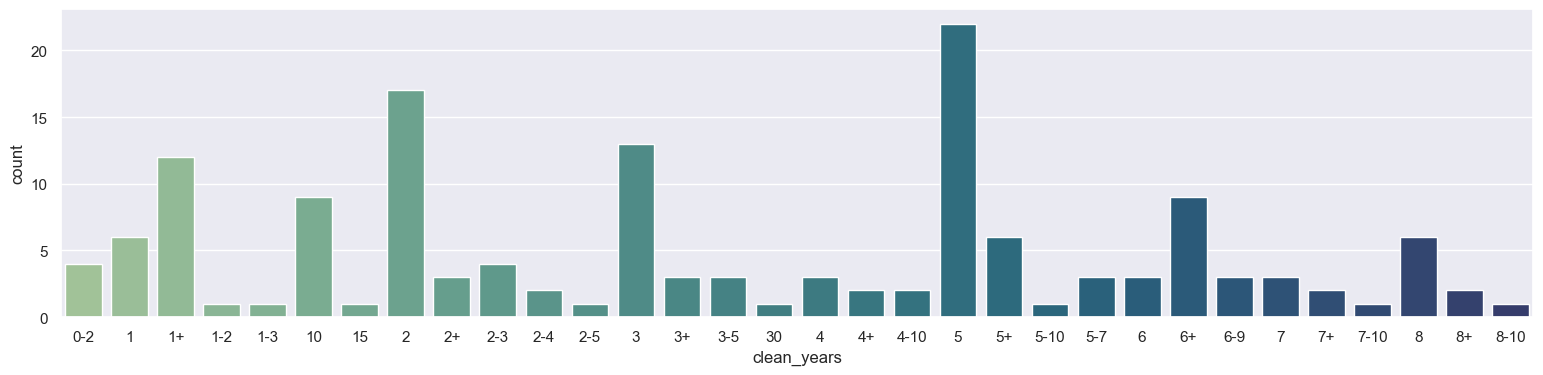

In [30]:
counts = df['clean_years'].value_counts().sort_index()

order = counts.index

sns.set_palette("crest", n_colors=32)

plt.figure(figsize=(19,4))
sns.countplot(x="clean_years", data=df, order=order)
plt.show()

Here, the exact ranges and years are combined by considering the minimum required years of experience.

In [31]:
#minimum required years of experience
def year_minimum(years):
    if years is None:
        return None
    elif re.match(r'^\d+\+$', years):
        return int(years[:-1])
    elif re.match(r'^\d+-\d+$', years):
        return int(years.split('-')[0])
    else:
        return int(years)

df['clean_years'] = df['clean_years'].apply(year_minimum)

In [32]:
df['clean_years'].value_counts()

clean_years
5.0     32
2.0     27
1.0     20
3.0     19
6.0     15
10.0     9
8.0      9
4.0      7
7.0      6
0.0      4
30.0     1
15.0     1
Name: count, dtype: int64

In [33]:
def standardize_years(year):
    if year is None:
        return None
    elif year >= 10 and year <=15:
        return '10+'
    else:
        return year

df['clean_years'] = df['clean_years'].apply(lambda x: standardize_years(x))

In [34]:
df['clean_years'].value_counts()

clean_years
5.0     32
2.0     27
1.0     20
3.0     19
6.0     15
10+     10
8.0      9
4.0      7
7.0      6
0.0      4
30.0     1
Name: count, dtype: int64

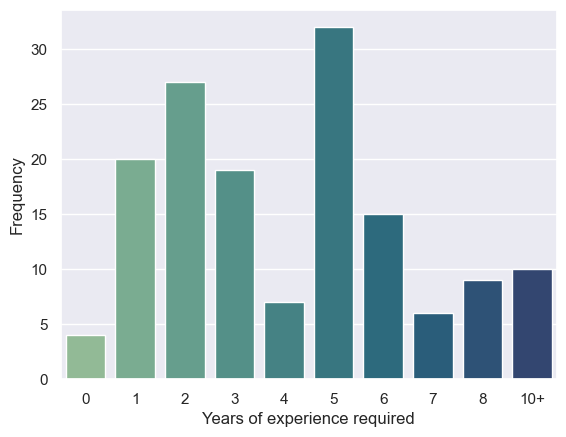

In [35]:
sns.set()
sns.set_palette("crest", n_colors=10)

sns.countplot(x="clean_years", data=df, order=[0, 1, 2, 3, 4, 5, 6, 7, 8, "10+"])

plt.xlabel('Years of experience required', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.show()
plt.savefig('img/years_of_experience_required.png')